# **Classification Problem**
* **Problem Statement : Predicting a Failure in Scania’s Air Pressure System**

* The Air Pressure System (APS) is an essential part of a heavy duty vehicle, where compressed air causes the piston to apply pressure on the brake pads to slow down the vehicle. The advantages of having an APS instead of a hydraulic setup is the easy availability and sustainability of air from nature.

* The dataset consists of data collected from heavy Scania trucks in everyday usage. These are failure cases of the trucks during operation, and our task is to predict whether a given failure is caused due to a specific component of the Air Pressure System. This may help in avoiding failure during truck operation and thereby reducing maintenance cost.

**Mountung drive to import dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

In [2]:
"""General Libraries"""
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from prettytable import PrettyTable
from tqdm import tqdm
"""Oversampling Libraries"""
from imblearn.over_sampling import SMOTE
"""Libraries for ML model"""
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import uniform,randint
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
"""Scaling"""
from sklearn.preprocessing import MinMaxScaler
"""Evaluation Metrics Libraries"""

from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

"""Model Saving Libraries"""
import pickle

"""To ignore warnings message"""
import warnings
warnings.filterwarnings("ignore")


# **Data injection**
**Complete dataset is available on my GitHub**
* UCI Repositary Link: https://archive.ics.uci.edu/ml/machine-learning-databases/00421/

In [3]:
url_train = '/content/drive/MyDrive/FSDS_Job_Gurantee/Tasks/Classification_Problems/Scania_Truck/aps_failure_training_set.csv'
url_test = '/content/drive/MyDrive/FSDS_Job_Gurantee/Tasks/Classification_Problems/Scania_Truck/aps_failure_test_set.csv' 
df_train = pd.read_csv(url_train,  skiprows = 20)
df_test = pd.read_csv(url_test, skiprows = 20)

## **Data Profiling**

**Merging test and train dataset for eda and data preprocessing**

In [4]:
df = pd.concat([df_train,df_test])
df.reset_index(drop = True, inplace = True)
df_old = df.copy()

In [5]:
df

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
75996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
75997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
75998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


* **Took 1000 sample due to memory issue in my laptop because Random Forest Algorithm takes long to run**

In [6]:
df = df.sample(n = 5000)

## **Basic Operations**

**Shape of the dataset**

In [7]:
df.shape

(5000, 171)

**columns name in the dataset**

In [8]:
df.columns

Index(['class', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000',
       'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

## **Data Cleaning**

**checking datatypes of each columns**

In [9]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

**Checking duplicates in the dataset**

In [10]:
df.duplicated().sum()

0

**Checking null values in the dataset**

In [11]:
df.isnull().sum().sum()

0

**Checking Unique Values in each column**

In [12]:
for i in df.columns:
  print(f"{i} : {df[i].unique()}")

class : ['neg' 'pos']
aa_000 : [  1210  41010     42 ... 118740  92320 246834]
ab_000 : ['na' '0' '2' '12' '4' '6' '8' '10' '134' '16' '26' '24']
ac_000 : ['60' '2130706434' '2130706436' '424' '2130706432' '0' 'na' '30' '596'
 '82' '18' '4018' '3772' '394' '236' '16' '24' '4' '96' '548' '2' '856'
 '272' '100' '20' '10' '566' '32' '26' '532' '86' '12' '36' '140' '2564'
 '14' '64' '2130706462' '646' '1530' '22' '42' '28' '586' '1080' '658'
 '48' '2130706448' '66' '832' '98' '250' '62' '172' '366' '212' '776'
 '238' '1564' '246' '122' '3398' '222' '1116' '2130706442' '78' '40' '266'
 '8' '1746' '660' '44' '148' '1186' '666' '264' '1376' '206' '166' '6'
 '634' '498' '224' '118' '1728' '672' '980' '480' '46' '522' '242' '2668'
 '2446' '444' '70' '3310' '560' '770' '620' '894' '696' '72' '154' '234'
 '1012' '1240' '1168' '178' '964' '2130706460' '638' '130' '68' '34' '54'
 '286' '94' '38' '1106' '642' '58' '510' '306' '12726' '228' '514' '52'
 '2130706446' '204' '1546' '188' '226' '474' '213

**Checking count of category in target column**

In [13]:
df['class'].value_counts()

neg    4901
pos      99
Name: class, dtype: int64

**Observaion:**
* **Highly imbalanced dataset**

# **Preprocessing**

* **Class label mapping to 0 and 1 for 'neg' and 'pos' respectively**

In [14]:
df['class'] = df['class'].map({'neg' : 0, 'pos' : 1})

**Checking for variables having standard deviaton 0, because we have lots of feautres**

In [15]:
for col in df.columns:
  print(f"{col}--------------")
  print(df[col].value_counts())

class--------------
0    4901
1      99
Name: class, dtype: int64
aa_000--------------
8         89
12        83
14        82
10        81
6         48
          ..
41220      1
365608     1
38432      1
31550      1
246834     1
Name: aa_000, Length: 3608, dtype: int64
ab_000--------------
na     3865
0       894
2       174
4        38
8         9
6         8
10        4
12        3
26        2
134       1
16        1
24        1
Name: ab_000, dtype: int64
ac_000--------------
0             756
2130706432    546
na            286
2130706434    100
4              71
             ... 
840             1
1286            1
1050            1
1240            1
810             1
Name: ac_000, Length: 786, dtype: int64
ad_000--------------
na       1269
0         170
4          92
2          80
8          76
         ... 
994         1
2856        1
53386       1
694         1
2170        1
Name: ad_000, Length: 754, dtype: int64
ae_000--------------
0      4634
na      204
2        35
4     

**Observation:**
* **There are lots of 'na' values present in the dataset**

### **Null Values Treatment**

* We will discard features with more than 70% missing values.
* For features with missing values less than 5%, we can drop those rows.
* For features with missing values between 5–15%, we will impute those missing values using mean/median.
* Now for the rest of the features with missing value% between 15–70% missing values, use model based imputation technique.

In [16]:
list_col = {}
for col in df.columns:
  per_nan = len(df[df[col] == 'na'][col])/len(df[col])*100
  if per_nan > 70 : # Dropping columns which have more than 70% of NaN values
    df.drop([col], axis = 1, inplace = True)
  if per_nan < 5:
    df.drop(df[df[col] == 'na'][col].index, inplace = True)
  if per_nan >= 5 and per_nan <= 70 :
    list_col[col] = per_nan

In [17]:
df.replace('na', np.nan, inplace = True)
df.replace(np.nan, -100, inplace = True)
df = df.astype(float)
df.replace(-100, np.nan, inplace = True)

### **Replacing with median**

In [18]:
for m,n in list_col.items():
  # if n> 5 and n < 1 :
  df[m].fillna(df[m].median(), inplace = True)

In [19]:
df.reset_index(drop = True, inplace = True)

# **Splitting into two dataframe**

In [20]:
prefix = []
# For each feature name, find it's Identifier and count  
for name in df.columns:
    prefix.append(name.split('_')[0])
counter = Counter(prefix)
feature_prefix = list(counter.keys())
bin_count = list(counter.values())

# **EDA**

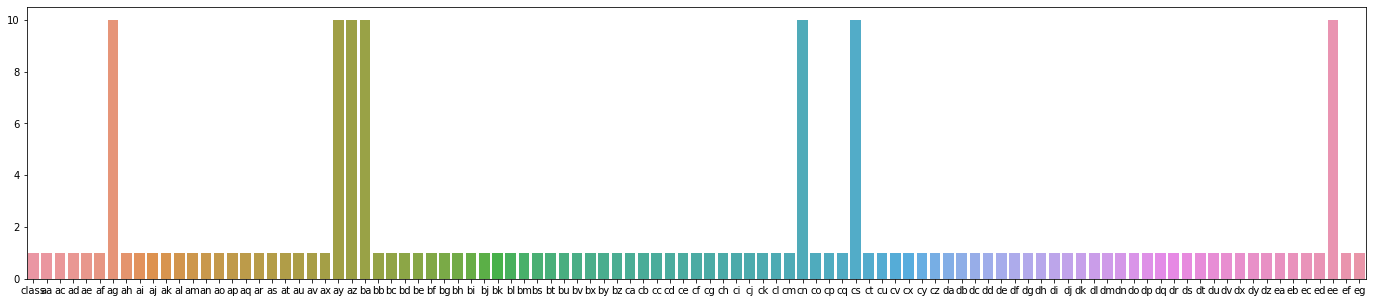

In [21]:
plt.figure(figsize=(24,5))
sns.barplot(x = feature_prefix,y = bin_count)
plt.show()

In [22]:
# Getting the Identifier of the histogram features
hist_identifier = [feature_prefix[i] for i,j in enumerate(bin_count) if j==10]
print("The Histogram Identifiers are: ",hist_identifier)

# Getting the names of the features having histograms bin information
hist_features = [i for i in df.columns if i.split('_')[0] in hist_identifier]
print("\nThere are",len(hist_features),"features that contain histogram bin information and they are: \n",hist_features)

The Histogram Identifiers are:  ['ag', 'ay', 'az', 'ba', 'cn', 'cs', 'ee']

There are 70 features that contain histogram bin information and they are: 
 ['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009']


In [23]:
histogram_data = df[hist_features]
df_without_hist = df.drop(hist_features,axis=1)

## **Histogram Feaure Analysis**

**Recursive Feature Elimination:**
* RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. This is in contrast to filter-based feature selections that score each feature and select those features with the largest (or smallest) score.
* When the full model is created, a measure of variable importance is computed that ranks the predictors from most important to least. […] At each stage of the search, the least important predictors are iteratively eliminated prior to rebuilding the model.

In [24]:

# Use RFE algorithm from sklearn to perform feature selection
feature_select = RFE(estimator=RandomForestClassifier(n_estimators=150,max_depth=5,random_state=1), n_features_to_select = 15, verbose=5)
feature_select.fit(histogram_data, df.iloc[ : , : 1])
# support_ gives an array of True/False for each feature where True signifies that the feature is selected
top_feature_hist = [ c for i,c in enumerate(histogram_data.columns.tolist()) if feature_select.support_[i] ]   

Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 features.
Fitting estimator with 46 features.
Fitting estimator with 45 features.
Fitting estimator with 44 features.
Fitting estimator with 43 fe

In [25]:
top_feature_hist

['ag_002',
 'ag_003',
 'ay_006',
 'ay_008',
 'az_000',
 'az_001',
 'az_002',
 'ba_003',
 'ba_006',
 'ba_009',
 'cn_009',
 'cs_002',
 'cs_004',
 'ee_000',
 'ee_005']

In [26]:
# Create a dataframe which is a subset of our original dataset and consists of only the top features and the class label

# WE WILL BE USING THE DATA WHICH CONSISTS OF MISSING VALUES FOR OUR EDA
top_features = pd.DataFrame(data = df[top_feature_hist],columns=top_feature_hist)
top_features['class'] = df['class']
top_features.head()

,ag_002,ag_003,ay_006,ay_008,az_000,az_001,az_002,ba_003,ba_006,ba_009,cn_009,cs_002,cs_004,ee_000,ee_005,class
0,0.0,0.0,0.0,31426.0,290.0,172.0,406.0,2122.0,198.0,18.0,0.0,2950.0,14136.0,26054.0,3252.0,0.0
1,260422.0,246896.0,1377384.0,1036702.0,3472.0,870.0,1010.0,186660.0,169784.0,14228.0,326.0,122484.0,216552.0,497802.0,493112.0,0.0
2,0.0,0.0,0.0,15888.0,70.0,2.0,8.0,224.0,264.0,18.0,0.0,34.0,8098.0,15650.0,120.0,0.0
3,0.0,0.0,94868.0,23292.0,202.0,48.0,60.0,9264.0,512.0,0.0,0.0,236.0,1832.0,13962.0,68788.0,0.0
4,0.0,0.0,0.0,19210.0,604.0,106.0,612.0,204.0,424.0,6.0,0.0,262.0,256.0,15756.0,94.0,0.0


### **Analysis of Histogram Features**

Feature 'ag_002' , Class Label 1, Mean: 274259.26
Standard Deviation 690326.69 

Feature 'ag_002' , Class Label 0, Mean: 1426.87
And Standard Deviation is 26501.25 


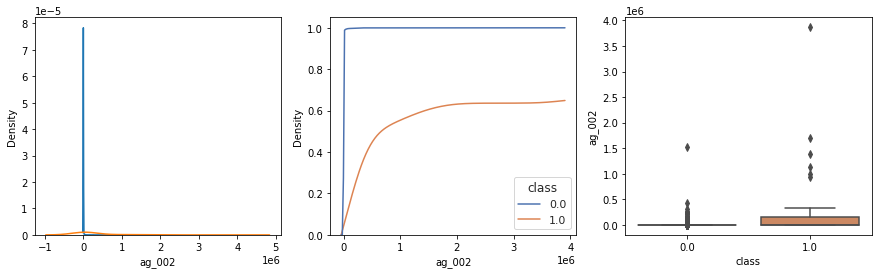

****************************************************************************************************
Feature 'ag_003' , Class Label 1, Mean: 1503818.23
Standard Deviation 2148897.13 

Feature 'ag_003' , Class Label 0, Mean: 24927.9
And Standard Deviation is 177468.22 


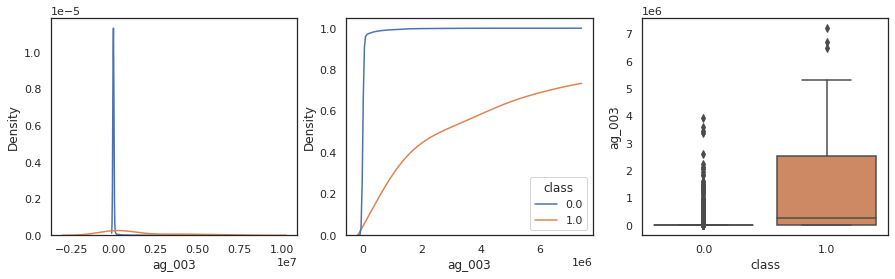

****************************************************************************************************
Feature 'ay_006' , Class Label 1, Mean: 4949597.44
Standard Deviation 11052233.86 

Feature 'ay_006' , Class Label 0, Mean: 861405.44
And Standard Deviation is 1904244.15 


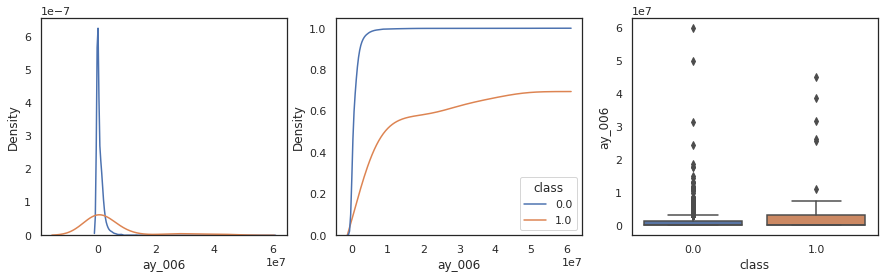

****************************************************************************************************
Feature 'ay_008' , Class Label 1, Mean: 8184310.05
Standard Deviation 6432179.21 

Feature 'ay_008' , Class Label 0, Mean: 623715.4
And Standard Deviation is 1955025.29 


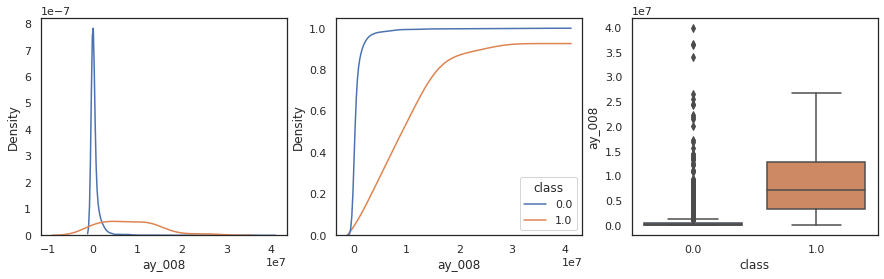

****************************************************************************************************
Feature 'az_000' , Class Label 1, Mean: 70363.12
Standard Deviation 133755.18 

Feature 'az_000' , Class Label 0, Mean: 3678.56
And Standard Deviation is 8359.06 


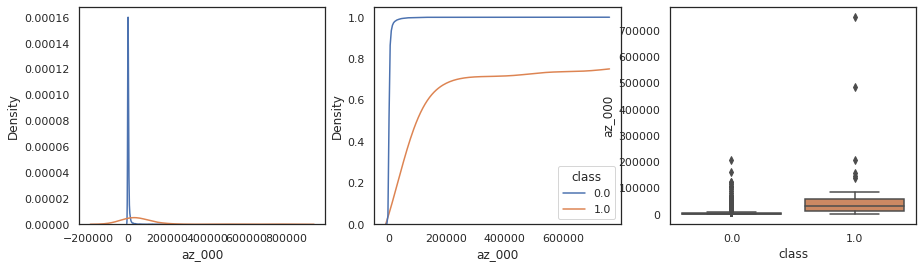

****************************************************************************************************
Feature 'az_001' , Class Label 1, Mean: 47609.35
Standard Deviation 81819.53 

Feature 'az_001' , Class Label 0, Mean: 2042.9
And Standard Deviation is 5987.29 


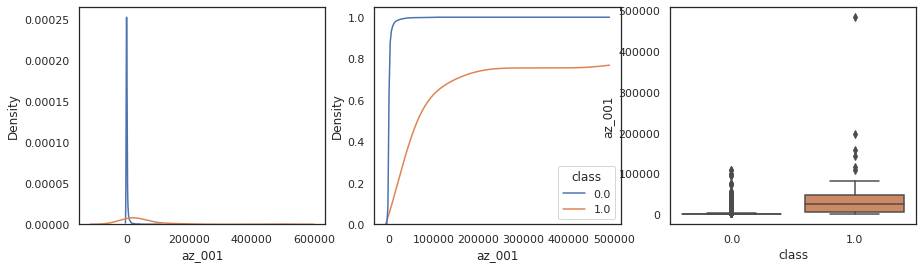

****************************************************************************************************
Feature 'az_002' , Class Label 1, Mean: 67394.93
Standard Deviation 97760.88 

Feature 'az_002' , Class Label 0, Mean: 3267.17
And Standard Deviation is 9914.39 


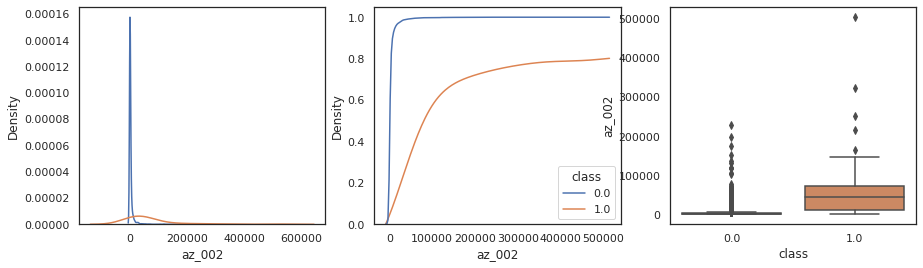

****************************************************************************************************
Feature 'ba_003' , Class Label 1, Mean: 1482842.79
Standard Deviation 1173749.46 

Feature 'ba_003' , Class Label 0, Mean: 175998.6
And Standard Deviation is 302530.0 


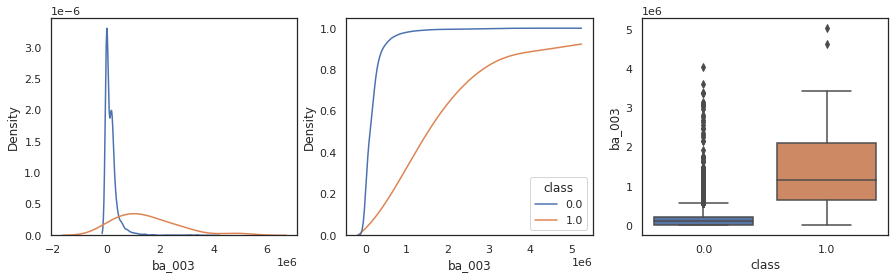

****************************************************************************************************
Feature 'ba_006' , Class Label 1, Mean: 1293022.47
Standard Deviation 2089096.57 

Feature 'ba_006' , Class Label 0, Mean: 139664.53
And Standard Deviation is 296726.51 


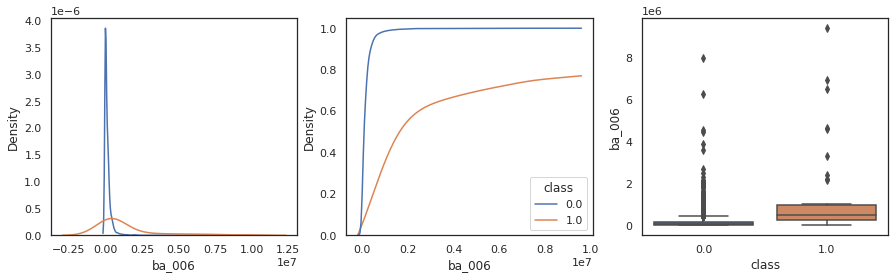

****************************************************************************************************
Feature 'ba_009' , Class Label 1, Mean: 417619.91
Standard Deviation 760575.31 

Feature 'ba_009' , Class Label 0, Mean: 11668.47
And Standard Deviation is 84560.9 


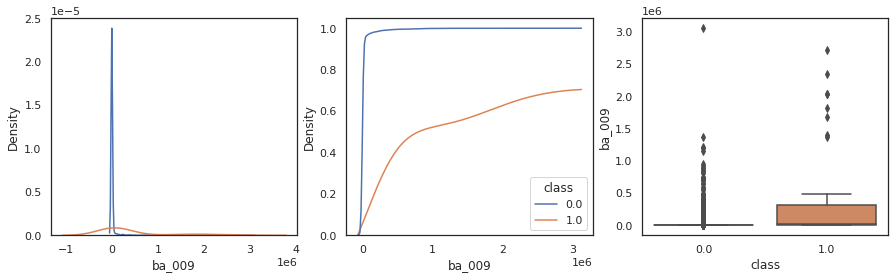

****************************************************************************************************
Feature 'cn_009' , Class Label 1, Mean: 122713.77
Standard Deviation 362874.51 

Feature 'cn_009' , Class Label 0, Mean: 1233.66
And Standard Deviation is 15348.37 


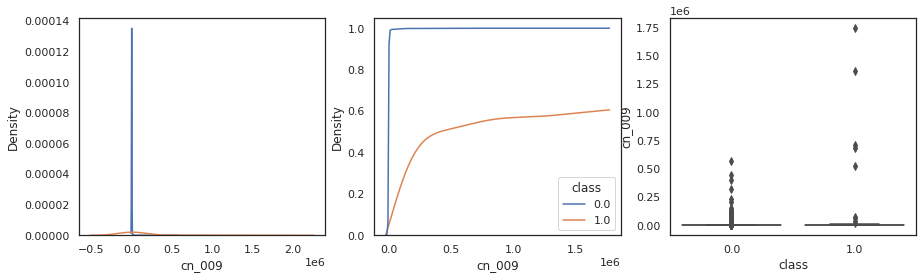

****************************************************************************************************
Feature 'cs_002' , Class Label 1, Mean: 2278599.81
Standard Deviation 2050273.16 

Feature 'cs_002' , Class Label 0, Mean: 104091.66
And Standard Deviation is 503088.76 


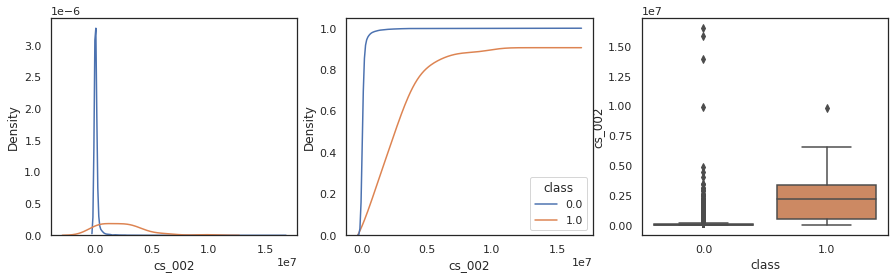

****************************************************************************************************
Feature 'cs_004' , Class Label 1, Mean: 4565666.51
Standard Deviation 6453964.46 

Feature 'cs_004' , Class Label 0, Mean: 212576.77
And Standard Deviation is 878371.02 


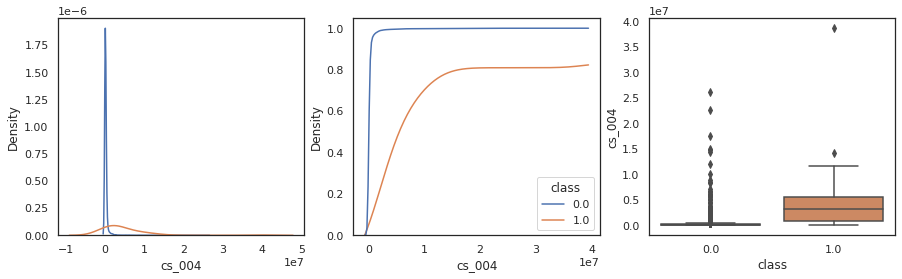

****************************************************************************************************
Feature 'ee_000' , Class Label 1, Mean: 4667709.58
Standard Deviation 4108057.18 

Feature 'ee_000' , Class Label 0, Mean: 448605.69
And Standard Deviation is 999749.77 


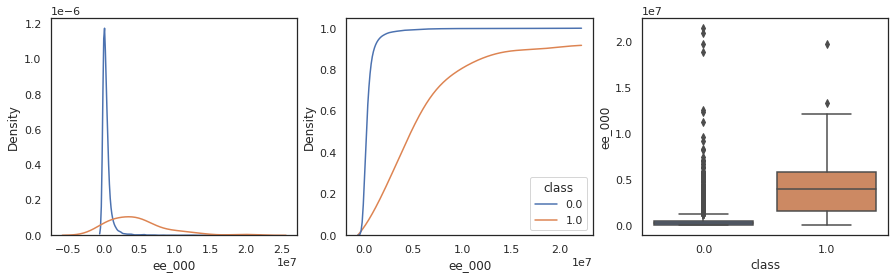

****************************************************************************************************
Feature 'ee_005' , Class Label 1, Mean: 3009322.79
Standard Deviation 3236679.75 

Feature 'ee_005' , Class Label 0, Mean: 272942.54
And Standard Deviation is 452150.33 


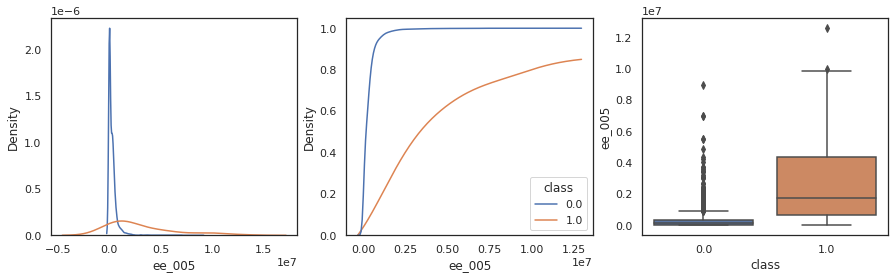

****************************************************************************************************


In [27]:

for n in top_features.columns.tolist():
  if n != 'class':

    describe_0 = top_features[top_features['class']==0].describe()
    describe_1 = top_features[top_features['class']==1].describe()

    fig,ax = plt.subplots(1,3,figsize=(15,4))

    print( '\033[1m' + "Feature '{}' , Class Label 1, Mean: {}".format(n , round(describe_1[n].iloc[1],2) ) )
    print( "Standard Deviation {} ".format( round(describe_1[n].iloc[2],2) ) )
    print( "\nFeature '{}' , Class Label 0, Mean: {}".format(n , round(describe_0[n].iloc[1],2) ) )
    print( "And Standard Deviation is {} ".format( round(describe_0[n].iloc[2],2) ) )

    sns.set_theme(style='white')
    # Plot PDF of points belonging to negative class
    sns.distplot(top_features[top_features['class']==0][n],ax=ax[0],hist=False)
    # Plot PDF of points belonging to positive class 
    sns.distplot(top_features[top_features['class']==1][n],ax=ax[0],hist=False)
    # Plot CDF of the feature values
    sns.kdeplot(data = top_features, x=top_features[n], hue="class",cumulative=True, common_norm=False, common_grid=True,ax=ax[1])
    # Plot the Box-Plot
    sns.boxplot(x=top_features['class'],y=top_features[n],ax=ax[2])
    plt.show()
    print('*'*100)

# plots(top_features)

### **Correlation**

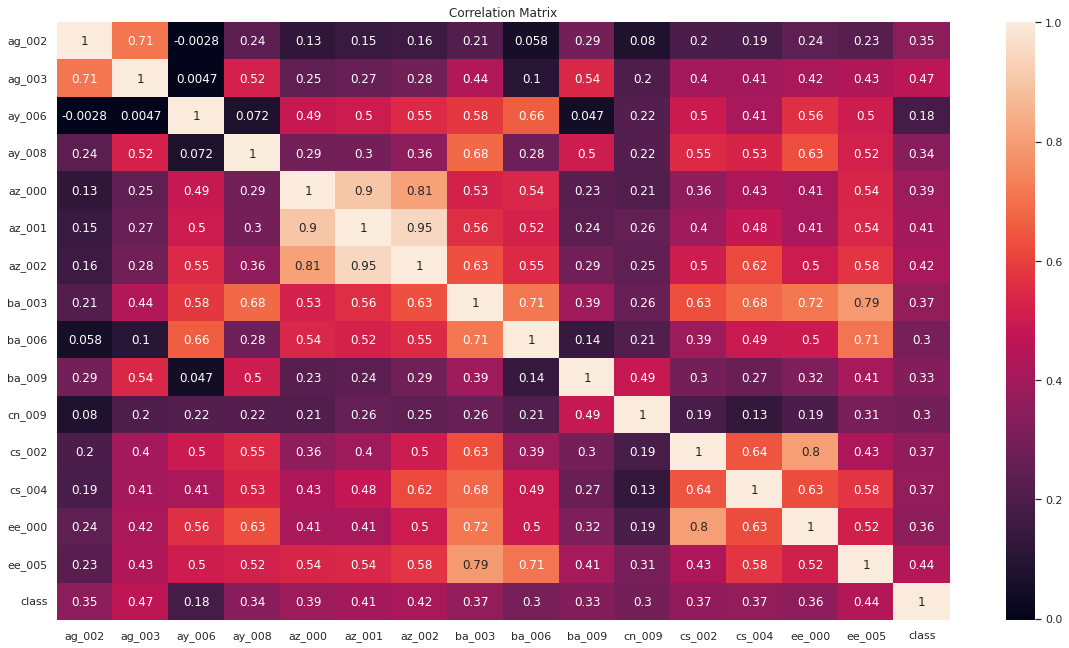

In [28]:
# Plot Correlation Heatmap      
plt.figure(figsize=(20,11))
sns.heatmap(top_features.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

In [29]:
# Getting correlation coeffiecients of features w.r.t class
correlation_values = top_features.corr().loc['class']

# Get top 5 features
top_correlated_features = correlation_values.sort_values().iloc[:5].index.tolist()
print("Most Uncorrelated Feature is",top_correlated_features[0])

Most Uncorrelated Feature is ay_006


Variation of top features w.r.t feature ay_006


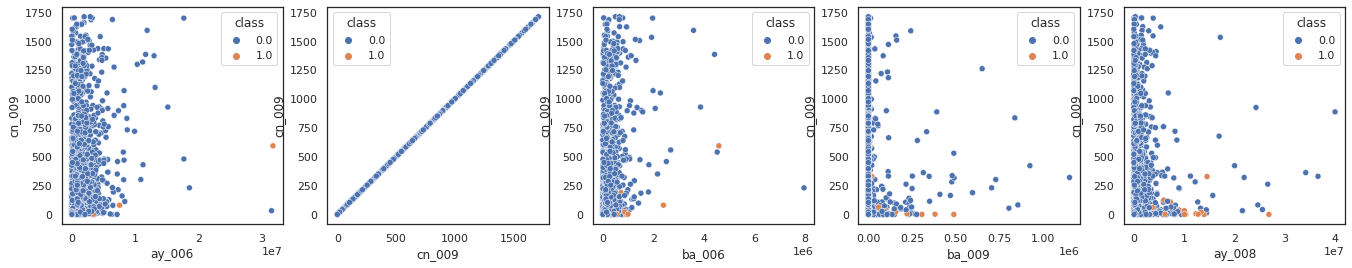

In [30]:
def plot_scatter(df,feature,percentile_value):
    """
    This function plots scatter plots between 
    all the features of the dataframe, w.r.t a given feature
    """
    fig,ax = plt.subplots(1,5,figsize=(23,4))

    # Only include the data consisting of values below the given percentile
    p = np.nanpercentile(df[feature],percentile_value)
    df = df[df[feature]<p]
    
    columns = df.columns.tolist()
    for i in range(len(columns)):
        if columns[i] !='class':
            # Plot scatterplot between 2 given features
            sns.scatterplot(x=df[columns[i]],y=df[feature],hue=df['class'],ax=ax[i])
    plt.show()


print('\033[1m'+"Variation of top features w.r.t feature",top_correlated_features[0])
plot_scatter(top_features[top_correlated_features + ['class']],top_correlated_features[1],95)

## **Numerical Feature Analysis**

In [31]:
# Use RFE algorithm from sklearn to perform feature selection
feature_select = RFE(estimator=RandomForestClassifier(n_estimators=150,max_depth=5,random_state=1), n_features_to_select = 15, verbose=5)
feature_select.fit(df_without_hist, df.iloc[ : , : 1])
# support_ gives an array of True/False for each feature where True signifies that the feature is selected
top_feature_num = [ c for i,c in enumerate(df_without_hist.columns.tolist()) if feature_select.support_[i] ]   

Fitting estimator with 94 features.
Fitting estimator with 93 features.
Fitting estimator with 92 features.
Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 fe

In [32]:
# Create a dataframe which is a subset of our original dataset and consists of only the top features and the class label
# WE WILL BE USING THE DATA WHICH CONSISTS OF MISSING VALUES FOR OUR EDA
top_features_num = pd.DataFrame(data=df[top_feature_num],columns=top_feature_num)
top_features_num['class'] = df.iloc[ : , : 1]
top_features_num.head()

,class,aa_000,al_000,am_0,ap_000,aq_000,bb_000,bj_000,ci_000,cj_000,ck_000,dg_000,dn_000,do_000,dp_000
0,0.0,1210.0,0.0,0.0,36626.0,2770.0,119544.0,13882.0,61409.28,10281.60,12937.92,11186.0,1006.0,82.0,28.0
1,0.0,41010.0,0.0,0.0,708188.0,449206.0,3315676.0,392020.0,2661324.48,18994.56,448676.16,0.0,26226.0,40442.0,20916.0
2,0.0,42.0,0.0,0.0,5346.0,1702.0,34870.0,3692.0,6535.68,207.36,14217.60,0.0,264.0,0.0,0.0
3,0.0,2292.0,0.0,0.0,29968.0,9870.0,156212.0,10274.0,122938.56,0.00,12505.92,0.0,924.0,370.0,174.0
4,0.0,38.0,2974.0,4860.0,8870.0,1820.0,29700.0,5414.0,4461.12,0.00,14504.64,0.0,618.0,0.0,0.0


### **Univariate Analysis**

Feature 'aa_000' , Class Label 1, Mean: 486910.37
Standard Deviation 351910.98 

Feature 'aa_000' , Class Label 0, Mean: 38987.76
And Standard Deviation is 71086.52 


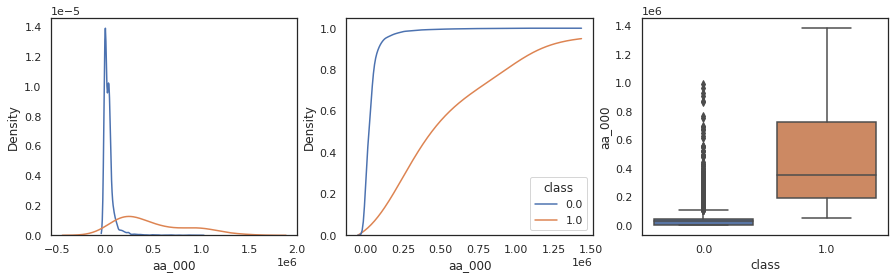

****************************************************************************************************
Feature 'al_000' , Class Label 1, Mean: 1139135.81
Standard Deviation 1382947.86 

Feature 'al_000' , Class Label 0, Mean: 17701.82
And Standard Deviation is 111315.71 


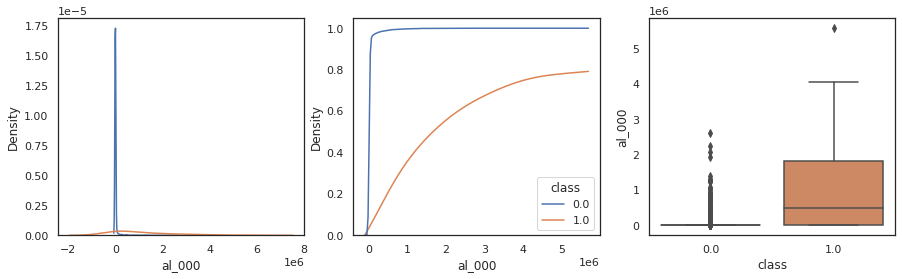

****************************************************************************************************
Feature 'am_0' , Class Label 1, Mean: 1753838.65
Standard Deviation 2139089.0 

Feature 'am_0' , Class Label 0, Mean: 26060.22
And Standard Deviation is 160017.91 


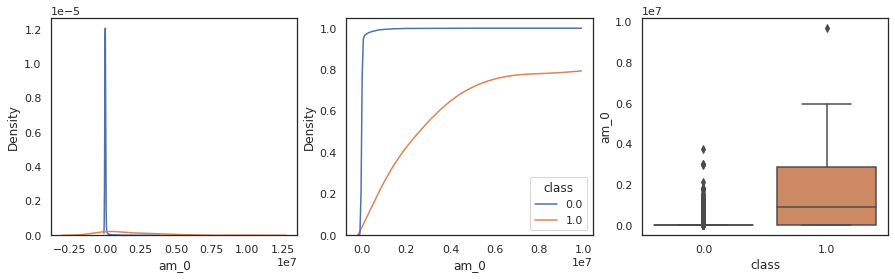

****************************************************************************************************
Feature 'ap_000' , Class Label 1, Mean: 8589275.81
Standard Deviation 6124486.57 

Feature 'ap_000' , Class Label 0, Mean: 570609.76
And Standard Deviation is 1186682.8 


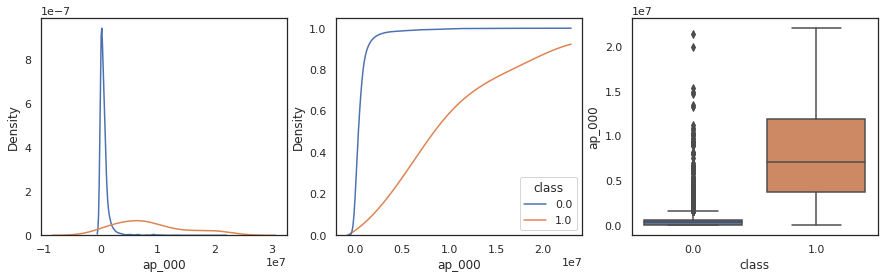

****************************************************************************************************
Feature 'aq_000' , Class Label 1, Mean: 3902593.44
Standard Deviation 2976109.67 

Feature 'aq_000' , Class Label 0, Mean: 275430.43
And Standard Deviation is 527181.96 


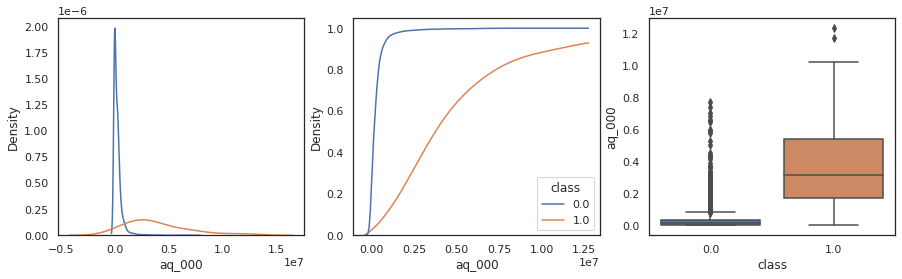

****************************************************************************************************
Feature 'bb_000' , Class Label 1, Mean: 36634493.02
Standard Deviation 24569201.72 

Feature 'bb_000' , Class Label 0, Mean: 2955583.1
And Standard Deviation is 5250255.57 


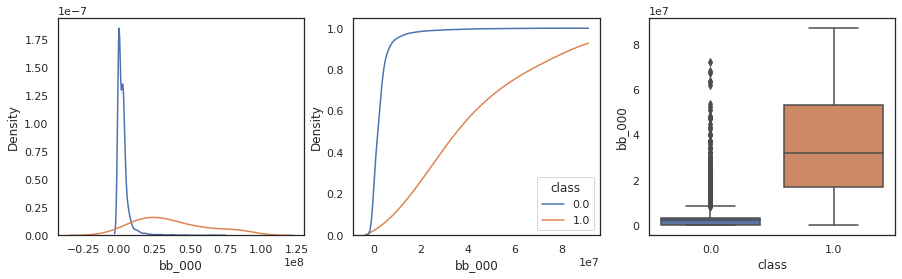

****************************************************************************************************
Feature 'bj_000' , Class Label 1, Mean: 4848820.88
Standard Deviation 3476393.31 

Feature 'bj_000' , Class Label 0, Mean: 262396.41
And Standard Deviation is 550698.95 


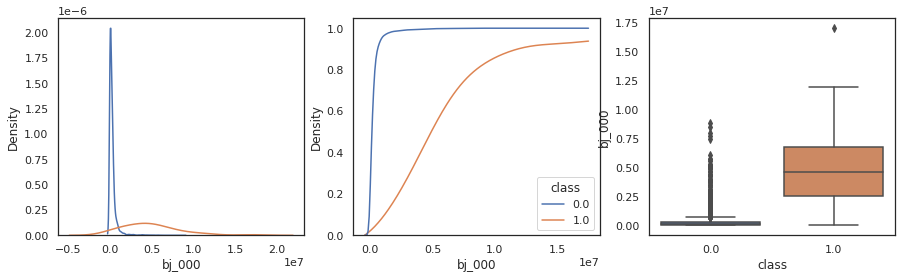

****************************************************************************************************
Feature 'ci_000' , Class Label 1, Mean: 28368510.56
Standard Deviation 18568849.26 

Feature 'ci_000' , Class Label 0, Mean: 2265957.59
And Standard Deviation is 3999281.76 


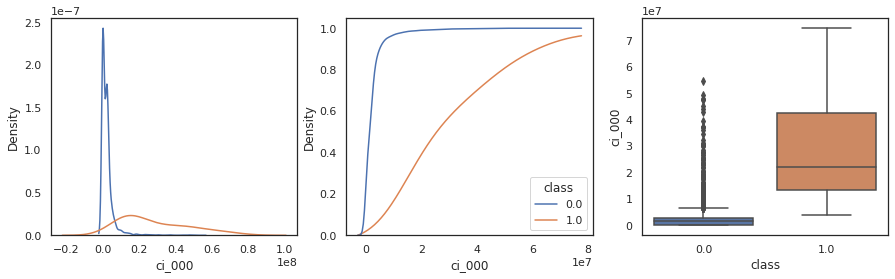

****************************************************************************************************
Feature 'cj_000' , Class Label 1, Mean: 1968760.43
Standard Deviation 3428078.3 

Feature 'cj_000' , Class Label 0, Mean: 35598.52
And Standard Deviation is 387958.87 


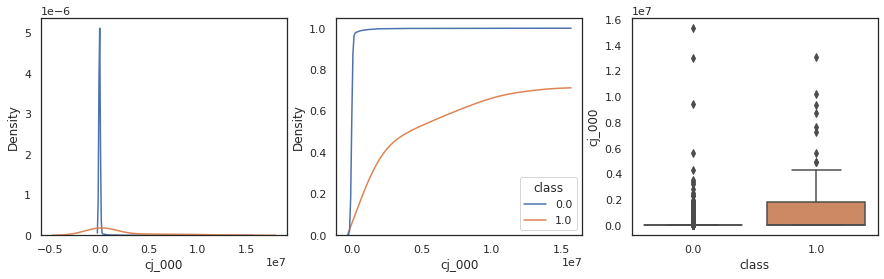

****************************************************************************************************
Feature 'ck_000' , Class Label 1, Mean: 5870874.57
Standard Deviation 3718223.76 

Feature 'ck_000' , Class Label 0, Mean: 425802.82
And Standard Deviation is 870715.07 


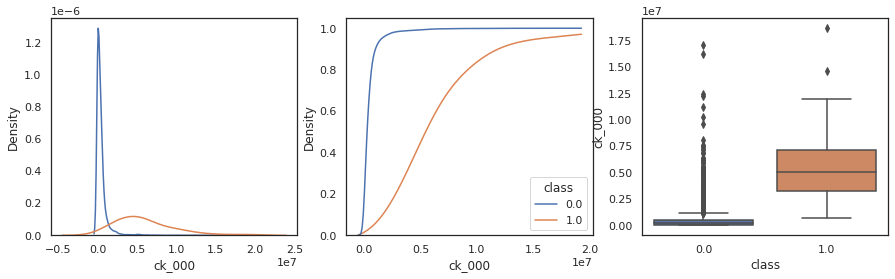

****************************************************************************************************
Feature 'dg_000' , Class Label 1, Mean: 722463.21
Standard Deviation 2569261.32 

Feature 'dg_000' , Class Label 0, Mean: 1212.15
And Standard Deviation is 27199.25 


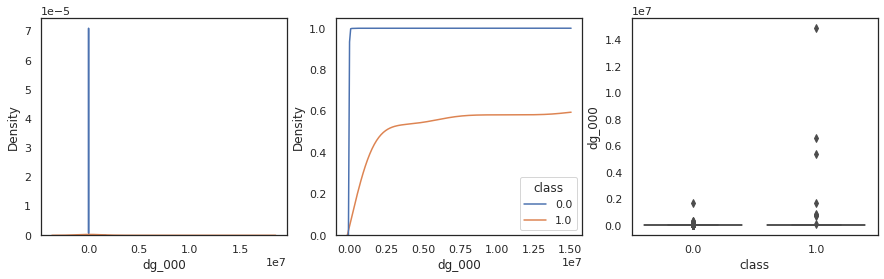

****************************************************************************************************
Feature 'dn_000' , Class Label 1, Mean: 336814.7
Standard Deviation 315290.77 

Feature 'dn_000' , Class Label 0, Mean: 21149.77
And Standard Deviation is 42613.07 


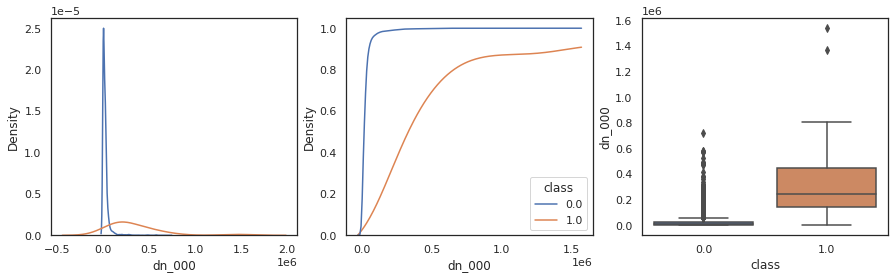

****************************************************************************************************
Feature 'do_000' , Class Label 1, Mean: 235894.6
Standard Deviation 318225.26 

Feature 'do_000' , Class Label 0, Mean: 25324.22
And Standard Deviation is 42882.59 


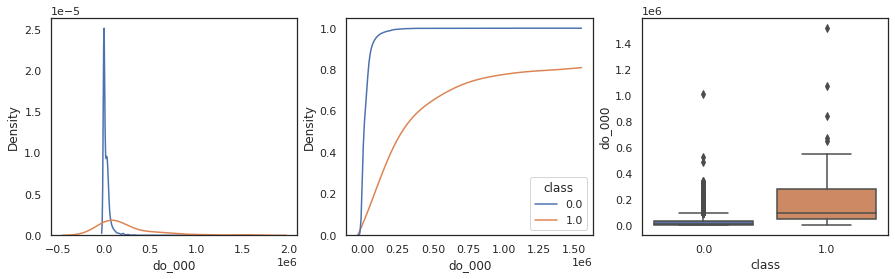

****************************************************************************************************
Feature 'dp_000' , Class Label 1, Mean: 49847.81
Standard Deviation 62666.82 

Feature 'dp_000' , Class Label 0, Mean: 6340.77
And Standard Deviation is 10537.04 


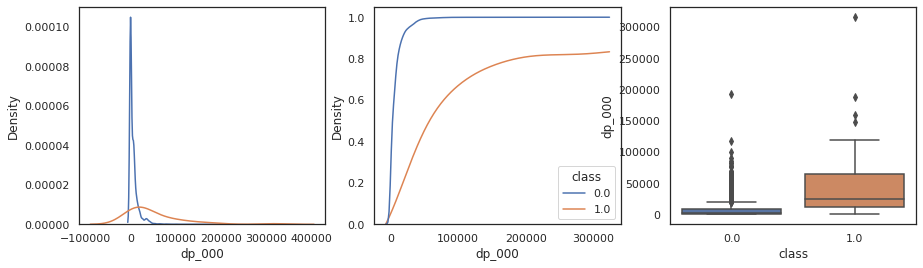

****************************************************************************************************


In [33]:
for n in top_features_num.columns.tolist():
  if n != 'class':

    describe_0 = top_features_num[top_features_num['class']==0].describe()
    describe_1 = top_features_num[top_features_num['class']==1].describe()

    fig,ax = plt.subplots(1,3,figsize=(15,4))

    print( '\033[1m' + "Feature '{}' , Class Label 1, Mean: {}".format(n , round(describe_1[n].iloc[1],2) ) )
    print( "Standard Deviation {} ".format( round(describe_1[n].iloc[2],2) ) )
    print( "\nFeature '{}' , Class Label 0, Mean: {}".format(n , round(describe_0[n].iloc[1],2) ) )
    print( "And Standard Deviation is {} ".format( round(describe_0[n].iloc[2],2) ) )

    sns.set_theme(style='white')
    # Plot PDF of points belonging to negative class
    sns.distplot(top_features_num[top_features_num['class']==0][n],ax=ax[0],hist=False)
    # Plot PDF of points belonging to positive class 
    sns.distplot(top_features_num[top_features_num['class']==1][n],ax=ax[0],hist=False)
    # Plot CDF of the feature values
    sns.kdeplot(data = top_features_num, x=top_features_num[n], hue="class",cumulative=True, common_norm=False, common_grid=True,ax=ax[1])
    # Plot the Box-Plot
    sns.boxplot(x=top_features_num['class'],y=top_features_num[n],ax=ax[2])
    plt.show()
    print('*'*100)

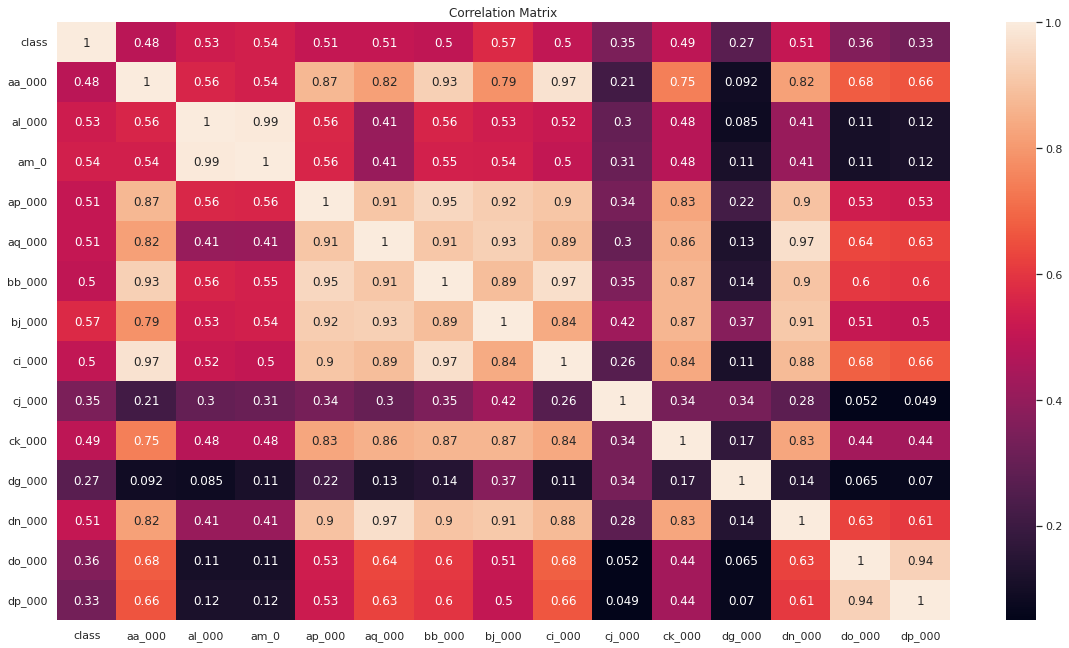

In [34]:
# Plot Correlation Heatmap      
plt.figure(figsize=(20,11))
sns.heatmap(top_features_num.corr(),annot=True)
plt.title("Correlation Matrix")
plt.show()

In [35]:
# Getting correlation coeffiecients of features w.r.t class
correlation_num_values = top_features_num.corr().loc['class']
# Get top 5 features
top_correlated_num_features = correlation_num_values.sort_values().iloc[:5].index.tolist()
print("Most Uncorrelated Feature is",top_correlated_num_features[0])

Most Uncorrelated Feature is dg_000


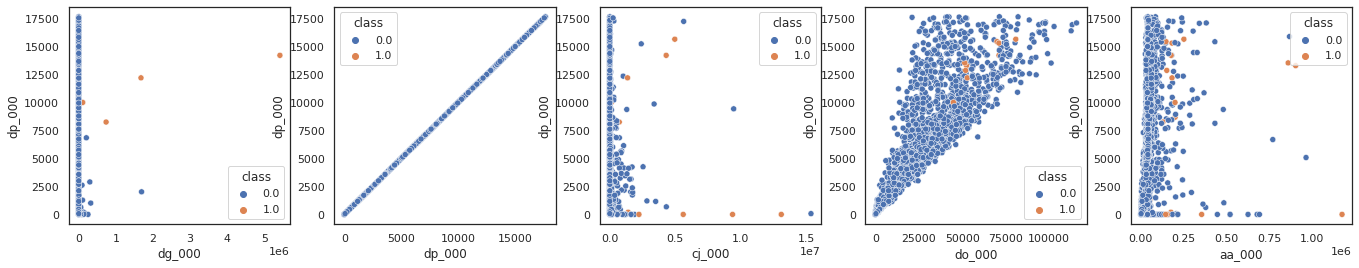

In [36]:
plot_scatter(top_features_num[top_correlated_num_features + ['class']],top_correlated_num_features[1],90)

# **Spliting Independent and Dependent Features**

In [37]:
X = df.iloc[:, 1 :]
y= df.iloc[:, : 1]

In [38]:
y.value_counts()

class
0.0      4474
1.0        43
dtype: int64

# **Train Test Split**

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=7,test_size=0.33)

# **Feature Engineering**

**Scaling**

In [40]:
def scale_data(df):
    """
    This function transforms features 
    by scaling each feature to a given range
    """
    min_max = MinMaxScaler()
    df = pd.DataFrame( data = min_max.fit_transform(df) , columns = df.columns )
    return df , min_max

**Synthetic Minority Oversampling Technique (SMOTE) for Imbalanced dataset**

In [41]:
y_train.value_counts()

class
0.0      3001
1.0        25
dtype: int64

In [42]:
X_train.shape

(3026, 163)

In [43]:
def balance_data(df,label):
    """
    This function balances the dataset by 
    creating dulicates of minority class points
    """
    # 15310
    smote_on_1 = 1200
    over = SMOTE(sampling_strategy={1: smote_on_1})
    under = RandomUnderSampler(sampling_strategy={1: smote_on_1})
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    df, label = pipeline.fit_resample(df, label)
    return df, label

X_train , y_train = balance_data(X_train , y_train)
print(X_train.shape)
print(y_train.value_counts())

(4201, 163)
class
0.0      3001
1.0      1200
dtype: int64


In [44]:
X_train.shape

(4201, 163)

In [45]:
y_train.isnull().sum().sum()

0

## **Scaling**
* **Some algoriithms need scaling and some doesn't**

In [46]:
def train_scale_data(df_train, df_test):
    """
    This function transforms features 
    by scaling each feature to a given range
    """
    min_max = MinMaxScaler()
    df_train = pd.DataFrame( data = min_max.fit_transform(df_train) , columns = df_train.columns )
    df_test = pd.DataFrame( data = min_max.transform(df_test) , columns = df_test.columns )
    return df_train, df_test

In [47]:
X_train_Scaled, X_test_Scaled = train_scale_data(X_train, X_test)

# **Model Creation**

In [48]:
"""Function to plot confusion matrix"""
def plot_confusion( y_test , y_hat ):
    """
    This function plots the Confusion Matrix
    based on the true and predicted class labels
    """    
    # Show Confusion Matrix Heatmap
    cf_matrix_test = confusion_matrix(y_test , y_hat)
        
    group_names = ["TN","FP","FN","TP"]
    group_counts = ["{}".format(value) for value in cf_matrix_test.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(cf_matrix_test, annot=labels, fmt='', cmap='Blues')
    plt.show()

In [49]:
"""Function to calculate prediction of the model"""
def model_results_pred( model , x_train , x_test , y_train , y_test ):
    """
    This function predicts class label of the data,
    and returns the Macro-F1 Score
    """
    # Predic class labels
    y_train_hat = model.predict(x_train)
    y_test_hat = model.predict(x_test) 
    
    f1_macro = f1_score(y_test, y_test_hat,average='macro')
    
    print('\033[1m'+'Macro-F1 Score: ',f1_macro)
    
    # Plot Test Confusion Matrix
    print("\tTest Confusion Matrix")
    plot_confusion(y_test,y_test_hat)
    
    return f1_macro

In [50]:
"""Function to calculate all evaluation metrics"""
def evaluation(x,y_pred):
    Accuracy = accuracy_score(x, y_pred)
    conf_mat = confusion_matrix(x, y_pred)
    true_positive = conf_mat[0][0]
    false_positive = conf_mat[0][1]
    false_negative = conf_mat[1][0]
    true_negative = conf_mat[1][1]
    Precision = true_positive /(true_positive + false_positive)
    Recall = true_positive/(true_positive + false_negative)
    # F1_Score_Test = 2*(Recall_Test * Precision_Test) / (Recall_Test + Precision_Test)
    F1_Macro_Score = f1_score(x, y_pred, average='micro')
    AUC = roc_auc_score(x, y_pred)
    return Accuracy,Precision,Recall,F1_Macro_Score,AUC

## Baseline Model using DummyClassifier
* We will predict all class labels to be 0 (majority class) and calculate the F1 score for the same. We can use sklearn's DummyClassifier to obtain our baseline results.

Macro-F1 Score:  0.49696356275303644
	Test Confusion Matrix


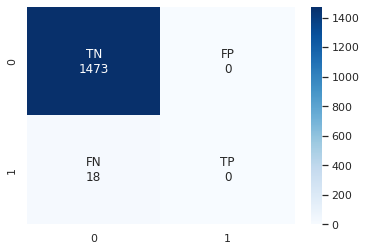

In [51]:
dummy_model = DummyClassifier(strategy='constant',constant=0)
dummy_model.fit(X_train,y_train)
F1_Base = model_results_pred( dummy_model , X_train , X_test , y_train , y_test )

## **All Model Creation**

In [52]:
'''Hyperparameters of Logistics Regression'''
LR_parameters = {
    'C': np.random.uniform(0.001,1,5),
    'tol':np.random.uniform(0.0001,0.1,5) 
    }

'''Hyperparameters of SGD Classifier With Hinge Loss'''
SGD_parameters = {
    'penalty': ['l1','l2'], 
    'alpha':np.random.uniform(0.0001,0.1,9) 
    }

'''Hyperparameters of Naive Bayes'''
NB_parameters = {
    'var_smoothing': np.random.uniform(1e-16,1e-14,100)
    }

'''Hyperparameters of Decision Tree Classifier'''
DTC_parameters = {
    'max_depth': np.random.randint(10,25,5)
    }

'''Hyperparameters of Random Forest Classifer'''
RF_parameters = {
    'n_estimators': [300,500,600,650,700],
    'max_depth': [80,110,125,135]
    }

'''Hyperparameters of Gradient Boosted Decision Trees'''
GBDT_parameters = {
    'n_estimators':[100, 250,350,500],
    'max_depth': [4,6,10,15],
    'learning_rate':[0.001,0.01,0.1,1,10]
    }

'''Hyperparameters of AdaBoost Classifier'''
AB_parameters = {
    'n_estimators':[ 400 , 600 , 650 , 700 , 750 , 800 ]
    }

'''All Models'''
models = {
1 : GridSearchCV(estimator = LogisticRegression(), param_grid = LR_parameters, scoring= 'f1_macro',verbose=2, n_jobs = -1, cv=5),
2 : GridSearchCV(estimator = SGDClassifier(), param_grid = SGD_parameters, scoring= 'f1_macro',verbose=2, n_jobs = -1, cv=5),
3 : GridSearchCV(estimator = GaussianNB(), param_grid = NB_parameters, scoring= 'f1_macro',verbose=2, n_jobs = -1, cv=5),
4 : GridSearchCV(estimator = DecisionTreeClassifier(), param_grid = DTC_parameters, scoring= 'f1_macro',verbose=2, n_jobs = -1, cv=5),
5 : GridSearchCV(estimator = RandomForestClassifier(), param_grid = RF_parameters, scoring= 'f1_macro',verbose=2, n_jobs = -1, cv=5),
6 : GridSearchCV(estimator = GradientBoostingClassifier(), param_grid = GBDT_parameters, scoring= 'f1_macro',verbose=2, n_jobs = -1, cv=5),
7 : GridSearchCV(estimator = AdaBoostClassifier(), param_grid = AB_parameters, scoring= 'f1_macro',verbose=2, n_jobs = -1, cv=5)

}


In [53]:
map_keys = list(models.keys())

In [54]:
# Get model name using id from linear_model_collection
def get_model_building_technique_name(num):
  if num == 1:
    return 'LogisticRegression_Tuned'
  if num == 2:
    return 'SGDClassifier_Hinge_Loss_Tuned'
  if num == 3:
    return 'NaiveBayes_Tune'
  if num == 4:
    return 'DecisionTreeClassifier_Tuned'
  if num == 5:
    return 'RandomForestClassifier_Tuned'
  if num == 6:
    return 'GradientBoostingClassifier_Tuned'
  if num == 7:
    return 'AdaBoostClassifier_Tuned'
  return ''

In [55]:
results = [];
for key_index in range(len(map_keys)):
  key = map_keys[key_index]
  try:  
    if key in [3,4,5,6,7,8]:
      model = models[key]
      print(key)
      model.fit(X_train, y_train)

      
      y_pred = model.predict(X_test)
      y_pred_train = model.predict(X_train)

      '''Test Accuracy'''
      Accuracy_Test, Precision_Test, Recall_Test, F1_Macro_Score_Test, AUC_Test =  evaluation(y_test, y_pred)

      '''Train Accuracy'''
      y_pred_train = model.predict(X_train)

      Accuracy_Train, Precision_Train, Recall_Train, F1_Macro_Score_Train, AUC_Train =  evaluation(y_train, y_pred_train)

      results.append({
          'Model Name' : get_model_building_technique_name(key),
          'Trained Model' : model,
          'Accuracy_Test' : Accuracy_Test,
          'Precision_Test' : Precision_Test,
          'Recall_Test' : Recall_Test, 
          'F1_Macro_Score_Test' : F1_Macro_Score_Test, 
          'AUC_Test' : AUC_Test,
          'Accuracy_Train' : Accuracy_Train,
          'Precision_Train' : Precision_Train,
          'Recall_Train' : Recall_Train, 
          'F1_Macro_Score_Train' : F1_Macro_Score_Train, 
          'AUC_Train' : AUC_Train
          })

    else:
      key = map_keys[key_index]
      model = models[key]
      print(key)
      model.fit(X_train_Scaled, y_train)
      y_pred = model.predict(X_test_Scaled)
      y_pred_train = model.predict(X_train_Scaled)

      '''Test Accuracy'''
      Accuracy_Test, Precision_Test, Recall_Test, F1_Macro_Score_Test, AUC_Test =  evaluation(y_test, y_pred)

      '''Train Accuracy'''
      Accuracy_Train, Precision_Train, Recall_Train, F1_Macro_Score_Train, AUC_Train =  evaluation(y_train, y_pred_train)
      
      results.append({
          'Model Name' : get_model_building_technique_name(key),
          'Trained Model' : model,
          'Accuracy_Test' : Accuracy_Test,
          'Precision_Test' : Precision_Test,
          'Recall_Test' : Recall_Test, 
          'F1_Macro_Score_Test' : F1_Macro_Score_Test, 
          'AUC_Test' : AUC_Test,
          'Accuracy_Train' : Accuracy_Train,
          'Precision_Train' : Precision_Train,
          'Recall_Train' : Recall_Train, 
          'F1_Macro_Score_Train' : F1_Macro_Score_Train, 
          'AUC_Train' : AUC_Train
          }) 
  except Exception as e:
    print(e)


1
Fitting 5 folds for each of 25 candidates, totalling 125 fits
2
Fitting 5 folds for each of 18 candidates, totalling 90 fits
3
Fitting 5 folds for each of 100 candidates, totalling 500 fits
4
Fitting 5 folds for each of 5 candidates, totalling 25 fits
5
Fitting 5 folds for each of 20 candidates, totalling 100 fits
6
Fitting 5 folds for each of 80 candidates, totalling 400 fits
7
Fitting 5 folds for each of 6 candidates, totalling 30 fits


In [56]:
result_df = pd.DataFrame(results)
result_df

,Model Name,Trained Model,Accuracy_Test,Precision_Test,Recall_Test,F1_Macro_Score_Test,AUC_Test,Accuracy_Train,Precision_Train,Recall_Train,F1_Macro_Score_Train,AUC_Train
0,LogisticRegression_Tuned,"GridSearchCV(cv=5, estimator=LogisticRegressio...",0.989269,0.993890,0.995241,0.989269,0.802501,0.989764,0.994668,0.991036,0.989764,0.986084
1,SGDClassifier_Hinge_Loss_Tuned,"GridSearchCV(cv=5, estimator=SGDClassifier(), ...",0.986586,0.989138,0.997262,0.986586,0.883458,0.980719,0.991336,0.981848,0.980719,0.972751
2,NaiveBayes_Tune,"GridSearchCV(cv=5, estimator=GaussianNB(), n_j...",0.953052,0.953836,0.998579,0.953052,0.921362,0.967389,0.961679,0.992435,0.967389,0.971673
3,DecisionTreeClassifier_Tuned,"GridSearchCV(cv=5, estimator=DecisionTreeClass...",0.985915,0.990496,0.995225,0.985915,0.800803,1.000000,1.000000,1.000000,1.000000,1.000000
4,RandomForestClassifier_Tuned,"GridSearchCV(cv=5, estimator=RandomForestClass...",0.988598,0.996606,0.991892,0.988598,0.664969,1.000000,1.000000,1.000000,1.000000,1.000000
5,GradientBoostingClassifier_Tuned,"GridSearchCV(cv=5, estimator=GradientBoostingC...",0.991281,0.997284,0.993911,0.991281,0.748642,1.000000,1.000000,1.000000,1.000000,1.000000
6,AdaBoostClassifier_Tuned,"GridSearchCV(cv=5, estimator=AdaBoostClassifie...",0.992622,0.999321,0.993252,0.992622,0.721883,1.000000,1.000000,1.000000,1.000000,1.000000


## Test Accuracy

In [57]:
result_df_test = result_df.iloc[: , [0,2,3,4,5,6]]
result_df_test

,Model Name,Accuracy_Test,Precision_Test,Recall_Test,F1_Macro_Score_Test,AUC_Test
0,LogisticRegression_Tuned,0.989269,0.993890,0.995241,0.989269,0.802501
1,SGDClassifier_Hinge_Loss_Tuned,0.986586,0.989138,0.997262,0.986586,0.883458
2,NaiveBayes_Tune,0.953052,0.953836,0.998579,0.953052,0.921362
3,DecisionTreeClassifier_Tuned,0.985915,0.990496,0.995225,0.985915,0.800803
4,RandomForestClassifier_Tuned,0.988598,0.996606,0.991892,0.988598,0.664969
5,GradientBoostingClassifier_Tuned,0.991281,0.997284,0.993911,0.991281,0.748642
6,AdaBoostClassifier_Tuned,0.992622,0.999321,0.993252,0.992622,0.721883


## Train Accuracy

In [58]:
result_df_train = result_df.iloc[: , [0,7,8,9,10,11]]
result_df_train

,Model Name,Accuracy_Train,Precision_Train,Recall_Train,F1_Macro_Score_Train,AUC_Train
0,LogisticRegression_Tuned,0.989764,0.994668,0.991036,0.989764,0.986084
1,SGDClassifier_Hinge_Loss_Tuned,0.980719,0.991336,0.981848,0.980719,0.972751
2,NaiveBayes_Tune,0.967389,0.961679,0.992435,0.967389,0.971673
3,DecisionTreeClassifier_Tuned,1.000000,1.000000,1.000000,1.000000,1.000000
4,RandomForestClassifier_Tuned,1.000000,1.000000,1.000000,1.000000,1.000000
5,GradientBoostingClassifier_Tuned,1.000000,1.000000,1.000000,1.000000,1.000000
6,AdaBoostClassifier_Tuned,1.000000,1.000000,1.000000,1.000000,1.000000


## **Confusion Matrix**
*  **In order to check False Negative values because our main concern is related tho FN**
* **FN should be less to optimise the cost of repair**

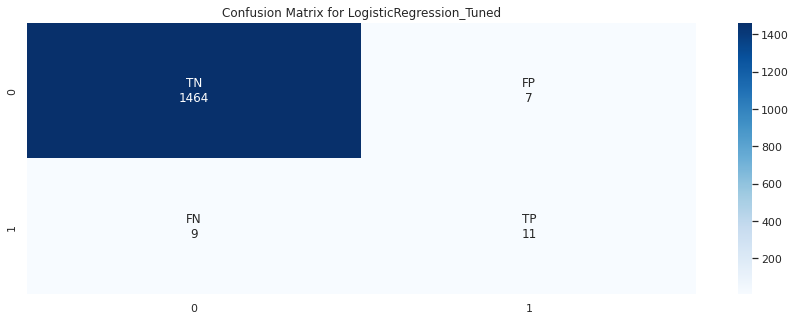

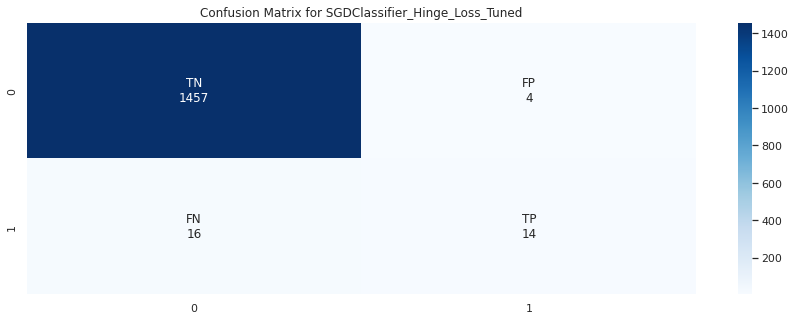

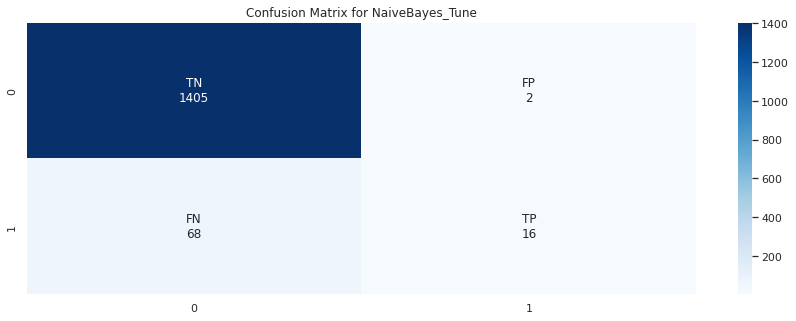

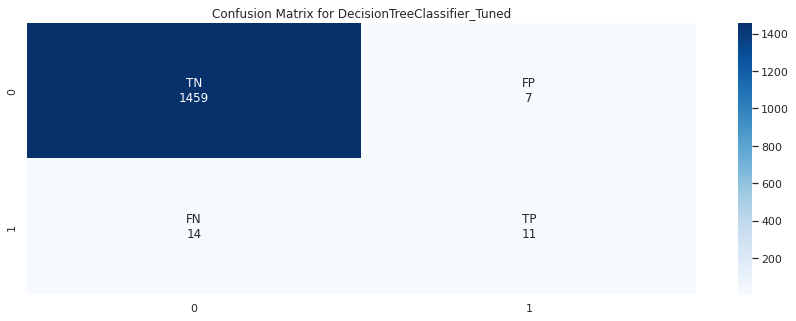

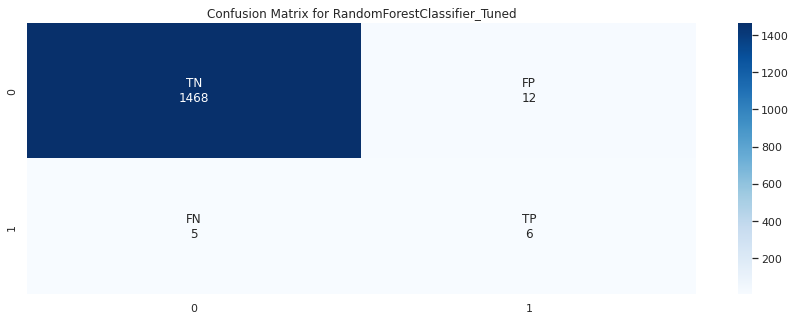

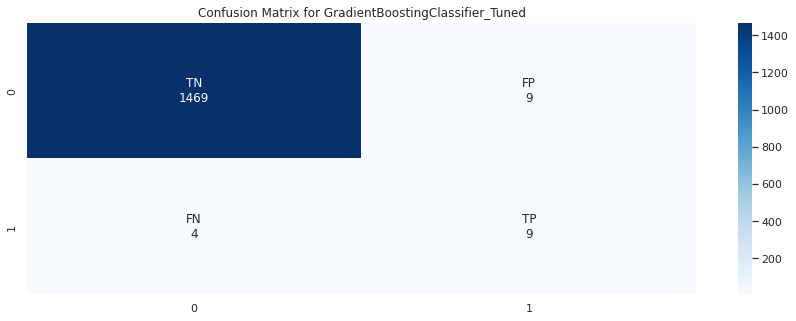

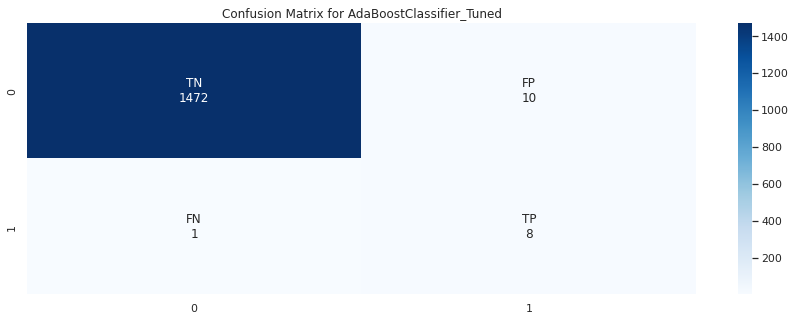

In [59]:
for i in range(7):
  if i in [2,3,4,5,6]:  
    model_pred = result_df['Trained Model'][i].predict(X_test)
    plt.figure(figsize = (15,5))
    plt.title(f"Confusion Matrix for {result_df['Model Name'][i]}")
    plot_confusion(model_pred,y_test)
  else:        
    model_pred = result_df['Trained Model'][i].predict(X_test_Scaled)
    plt.figure(figsize = (15,5))
    plt.title(f"Confusion Matrix for {result_df['Model Name'][i]}")
    plot_confusion(model_pred,y_test)

## **ROC-AUC Curve for all the model**

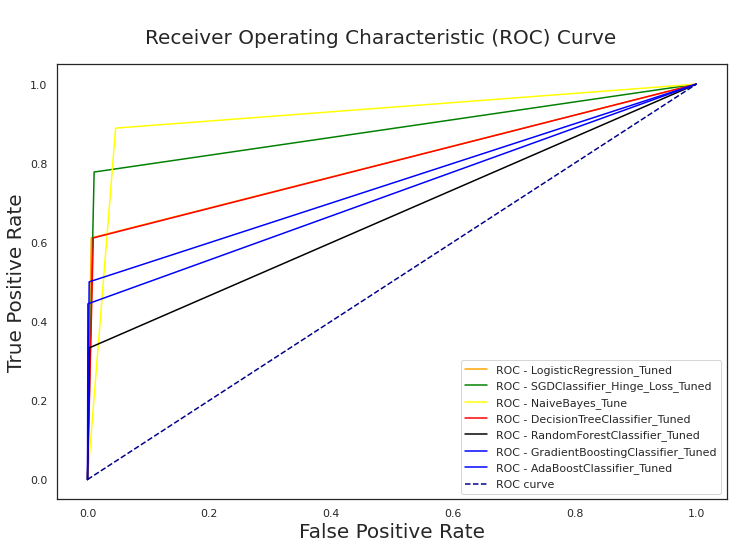

In [60]:
fpr_dict = {}
tpr_dict = {}
for i in range(7):
  if i in [2,3,4,5,6]:  
    model_pred = result_df['Trained Model'][i].predict(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, model_pred)
    fpr_dict[i] = fpr
    tpr_dict[i] = tpr
  else:        
    model_pred = result_df['Trained Model'][i].predict(X_test_Scaled)
    fpr, tpr, thresholds = roc_curve(y_test, model_pred)
    fpr_dict[i] = fpr
    tpr_dict[i] = tpr
plt.figure(figsize=(12,8))
plt.suptitle('\nReceiver Operating Characteristic (ROC) Curve', fontsize=20)
plt.plot(fpr_dict[0], tpr_dict[0], color='orange', label=f"ROC - {result_df['Model Name'][0]}")
plt.plot(fpr_dict[1], tpr_dict[1], color='green', label=f"ROC - {result_df['Model Name'][1]}")
plt.plot(fpr_dict[2], tpr_dict[2], color='yellow', label=f"ROC - {result_df['Model Name'][2]}")
plt.plot(fpr_dict[3], tpr_dict[3], color='red', label=f"ROC - {result_df['Model Name'][3]}")
plt.plot(fpr_dict[4], tpr_dict[4], color='black', label=f"ROC - {result_df['Model Name'][4]}")
plt.plot(fpr_dict[5], tpr_dict[5], color='blue', label=f"ROC - {result_df['Model Name'][5]}")
plt.plot(fpr_dict[6], tpr_dict[6], color='blue', label=f"ROC - {result_df['Model Name'][6]}")

plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve')
plt.xlabel('False Positive Rate',fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate',fontdict={'fontsize': 20})
plt.legend()
plt.show()

## **Checking Best Model**

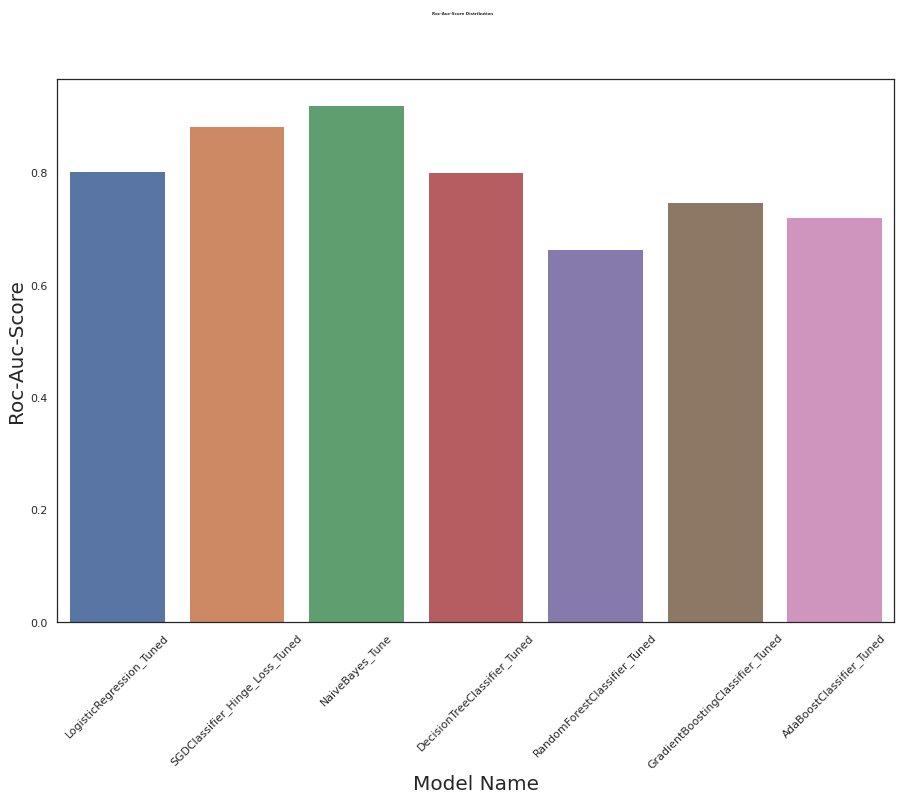

In [61]:
plt.figure(figsize=(15,10)) 
plt.suptitle('\nRoc-Auc-Score Distribution\n\n', fontsize=4, fontweight='bold')
sns.barplot(data=result_df, x='Model Name', y='AUC_Test')
plt.xlabel('Model Name',fontdict={'fontsize': 20})
plt.ylabel('Roc-Auc-Score',fontdict={'fontsize': 20})
plt.xticks(rotation=45)
plt.show()

In [62]:
Best_Model_Name = result_df['Trained Model'][result_df[result_df['AUC_Test'] == max(result_df['AUC_Test'])]['Trained Model'].index[0]]
Best_Model_Index = result_df['Trained Model'][result_df[result_df['AUC_Test'] == max(result_df['AUC_Test'])]['Trained Model'].index].index[0]
Best_Model_Name

GridSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([8.31276574e-15, 1.44811481e-16, 2.26944210e-15, 7.46497378e-15,
       3.04648650e-15, 3.34646848e-15, 2.50135853e-15, 5.18028661e-15,
       6.18893309e-16, 5.97753128e-15, 7.73128601e-15, 1.75439363e-16,
       2.48023067e-15, 2.71231852e-15, 5.88345610e-15, 4.19446296e-15,
       2.11473711e-15, 1.0713546...
       1.59409042e-15, 4.55533309e-15, 8.77765827e-15, 9.04856587e-15,
       9.60900817e-15, 5.32678436e-15, 2.35624536e-16, 7.21503164e-15,
       6.33336089e-15, 9.46785318e-15, 6.15051158e-15, 8.28875294e-15,
       3.13713632e-15, 7.58298697e-15, 8.51334235e-15, 8.54306310e-15,
       3.76162678e-15, 9.11207820e-16, 5.48260480e-15, 8.60032926e-15,
       5.19531668e-15, 3.64120721e-15, 4.36723562e-15, 1.38892504e-15])},
             scoring='f1_macro', verbose=2)

## **Save Best Model**

In [63]:
import pickle
Best_Trained_model = Best_Model_Name
with open('APS_Failure_Detecion.sav', 'wb') as best_model_pickle:
 pickle.dump(Best_Trained_model, best_model_pickle)

---
# **THE END**
* We can optimize the model as per business need. This project has been done for my practice purpose
---


